<a href="https://colab.research.google.com/github/Bagautdino/LAB1/blob/main/Lab_1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить матричным способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

In [13]:
import numpy as np
#Ввод чисел с клавиатуры по 3 числа, перевод в массив натуральных чисел
first_eq = str(input("Введите [a11, a12, b1] через пробел: "))
first_eq = np.fromstring(first_eq, dtype=int, sep=' ')
second_eq = str(input("Введите [a21, a22, b2] через пробел: "))
second_eq = np.fromstring(second_eq, dtype=int, sep=' ')

Введите [a11, a12, b1] через пробел: 1 2 3
Введите [a21, a22, b2] через пробел: 4 5 6


In [18]:
#Выражаем Y через X
x = list(range(-100,100))
y1 = [(first_eq[2]-first_eq[0]*x1)/first_eq[1] for x1 in x]
y2 = [(second_eq[2]-second_eq[0]*x2)/second_eq[1] for x2 in x]

In [15]:
#eq_1 - матрица коэфициэнтов, eq_2 - матрица свободных членов
eq_1 = np.array([[first_eq[0], first_eq[1]], [second_eq[0], second_eq[1]]])
eq_2 = np.array([first_eq[2], second_eq[2]]).reshape((2,1))

Решение:  [[-1.]
 [ 2.]]


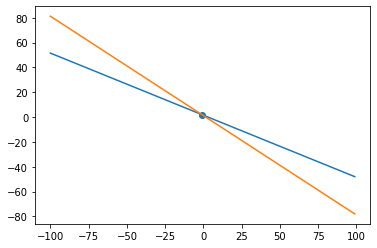

In [16]:
from matplotlib import pyplot as plt
from scipy.linalg import solve
from scipy.linalg.misc import LinAlgError

#Решение и рисование на графике
fig, ax = plt.subplots()
try:
  res = solve(eq_1,eq_2)
  print("Решение: ", res)
  plt.plot(x, y1)
  plt.plot(x, y2)
  ax.scatter(res[0], res[1])
except LinAlgError as lae:
  print("Если решений нет - графики параллельны, если решений бесконечно - графики идентичные")
  plt.plot(x,y1)
  plt.plot(x,y2)

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

In [20]:
import torch
import matplotlib.pyplot as plt

In [21]:
# Определение функций
x = torch.linspace(-30, 30, 1000, requires_grad=True)
y = torch.sin(x) * x
y.backward(x)

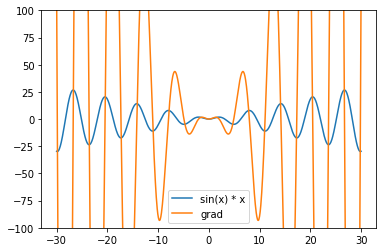

In [22]:
# Построение графиков
fig, ax = plt.subplots()
ax.set_ylim((-100, 100))
plt.plot(x.detach().numpy(), y.detach().numpy(), label='sin(x) * x')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='grad')
plt.legend()
plt.show()